In [15]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/


In [16]:
from all_in_one_ml import beginner
from sklearn import datasets
import pandas as pd

In [17]:
data = datasets.fetch_openml('ilpd')

In [18]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['class'] = data.target

In [19]:
df.head()

V1   V2    V3   V4     V5    V6     V7   V8   V9   V10 class
0  65.0  0.0   0.7  0.1  187.0  16.0   18.0  6.8  3.3  0.90     1
1  62.0  1.0  10.9  5.5  699.0  64.0  100.0  7.5  3.2  0.74     1
2  62.0  1.0   7.3  4.1  490.0  60.0   68.0  7.0  3.3  0.89     1
3  58.0  1.0   1.0  0.4  182.0  14.0   20.0  6.8  3.4  1.00     1
4  72.0  1.0   3.9  2.0  195.0  27.0   59.0  7.3  2.4  0.40     1

In [20]:
x = df.drop(columns=['class'])
y = df['class']

In [21]:
x_hot,y_hot = beginner.one_hot(x,y,cat='~')
print(x_hot,y_hot)

     V1_4.0  V1_6.0  V1_7.0  V1_8.0  ...  V10_1.85  V10_1.9  V10_2.5  V10_2.8
0         0       0       0       0  ...         0        0        0        0
1         0       0       0       0  ...         0        0        0        0
2         0       0       0       0  ...         0        0        0        0
3         0       0       0       0  ...         0        0        0        0
4         0       0       0       0  ...         0        0        0        0
..      ...     ...     ...     ...  ...       ...      ...      ...      ...
578       0       0       0       0  ...         0        0        0        0
579       0       0       0       0  ...         0        0        0        0
580       0       0       0       0  ...         0        0        0        0
581       0       0       0       0  ...         0        0        0        0
582       0       0       0       0  ...         0        0        0        0

[583 rows x 1027 columns]      1  2
0    1  0
1    1  0
2    1 

In [22]:
x_train,x_test,y_train,y_test = beginner.split_dataset(x_hot,y_hot,0.2,8)

(466, 1027) (466, 2) (117, 1027) (117, 2)


In [23]:
x_train.head()

V1_4.0  V1_6.0  V1_7.0  V1_8.0  ...  V10_1.85  V10_1.9  V10_2.5  V10_2.8
425       0       0       0       0  ...         0        0        0        0
470       0       0       0       0  ...         0        0        0        0
499       0       0       0       0  ...         0        0        0        0
176       0       0       0       0  ...         0        0        0        0
292       0       0       0       0  ...         0        0        0        0

[5 rows x 1027 columns]

In [24]:
y_train.head()

1  2
425  1  0
470  1  0
499  1  0
176  1  0
292  1  0

In [25]:
model,history = beginner.build_compile_fit_model(x_train,y_train,'classification',30,3,[100,100,100],['relu','relu','relu'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               102800    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
Total params: 123,202
Trainable params: 123,202
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
12/12 [==============================] - 0s 14ms/step - loss: 0.6580 - accuracy: 0.6559 - val_loss: 0.5512 - val_accuracy: 0.7872
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.6828 - val_l

In [26]:
beginner.get_accuracy(x_test,y_test,model)

4/4 [==============================] - 0s 2ms/step - loss: 1.5323 - accuracy: 0.7009


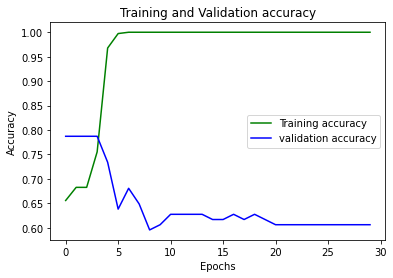

In [27]:
beginner.accuracy_vs_valaccuracy(model,history,30)

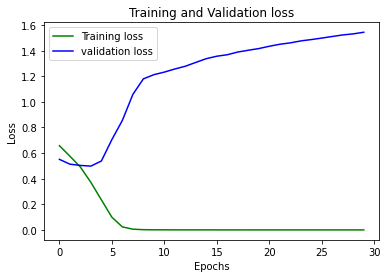

In [28]:
beginner.loss_vs_valloss(model,history,30)